<a href="https://colab.research.google.com/github/Sudharsan72692/College/blob/main/SML_Used_Car_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
from scipy.stats import skew
plt.style.use('ggplot')
import missingno as msno # to get visualization on missing values
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations
import statsmodels.api as sm
print("Load Libraries- Done")

Load Libraries- Done


In [ ]:
#Reading the csv file  used car data.csv
data_path='/content/used_cars_data.csv'
df=pd.read_csv(data_path,index_col=0)
cars=df.copy()
print(f'There are {cars.shape[0]} rows and {cars.shape[1]} columns') # fstring

There are 7253 rows and 13 columns


In [ ]:
cars.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00000,NaN,1.75000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00000,NaN,12.50000
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00000,8.61 Lakh,4.50000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00000,NaN,6.00000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00000,NaN,17.74000


In [ ]:
cars.tail(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00000,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.00000,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.00000,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.00000,NaN,NaN
7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avantgarde,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.00000,NaN,NaN


In [ ]:
print ("Rows     : " , cars.shape[0])  #get number of rows/observations
print ("Columns  : " , cars.shape[1]) #get number of columns
print ("#"*40,"\n","Features : \n\n", cars.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", cars.isnull().sum().sort_values(ascending=False))
print( "#"*40,"\nPercent of missing :\n\n", round(cars.isna().sum() / cars.isna().count() * 100, 2)) # looking at columns with most Missing Values
print ("#"*40,"\nUnique values :  \n\n", cars.nunique())  #  count of unique values

Rows     :  7253
Columns  :  13
######################################## 
 Features : 

 ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']
######################################## 
Missing values :

 New_Price            6247
Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64
######################################## 
Percent of missing :

 Name                 0.00000
Location             0.00000
Year                 0.00000
Kilometers_Driven    0.00000
Fuel_Type            0.00000
Transmission         0.00000
Owner_Type           0.00000
Mileage              0.03000
Engine               0.63000
Power              

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


<Axes: >

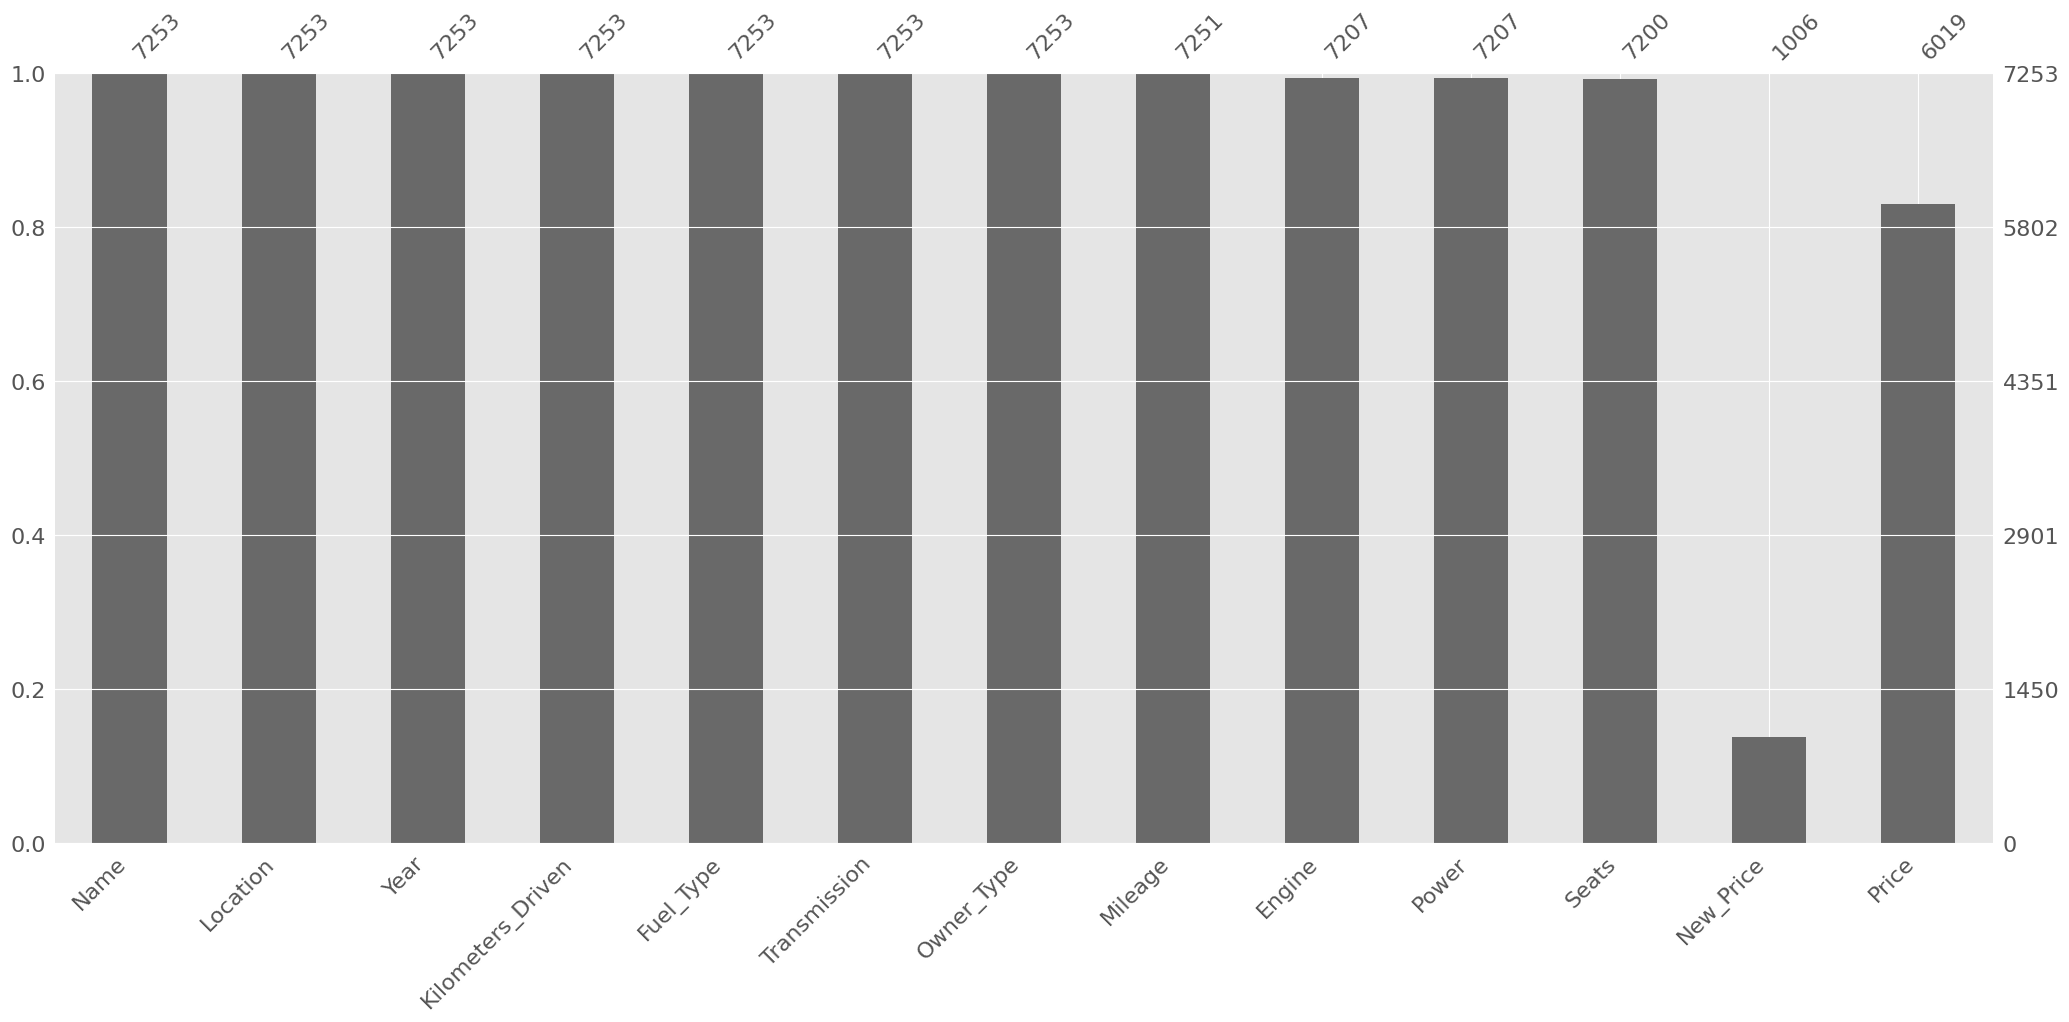

In [ ]:
msno.bar(cars)

In [ ]:
# Making a list of all categorical variables
cat_col = [
    "Fuel_Type",
    "Location",
    "Transmission",
    "Seats",
    "Year",
    "Owner_Type",

]
# Printing number of count of each unique value in each column
for column in cat_col:
    print(cars[column].value_counts())
    print("#" * 40)

Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64
########################################
Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64
########################################
Transmission
Manual       5204
Automatic    2049
Name: count, dtype: int64
########################################
Seats
5.00000     6047
7.00000      796
8.00000      170
4.00000      119
6.00000       38
2.00000       18
10.00000       8
9.00000        3
0.00000        1
Name: count, dtype: int64
########################################
Year
2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2

In [ ]:
cars[['Engine','Power','Mileage']].sample(10)

,Engine,Power,Mileage
S.No.,,,
3304,1493 CC,110 bhp,16.2 kmpl
220,1197 CC,81.86 bhp,17.19 kmpl
6053,1248 CC,74 bhp,23.4 kmpl
5152,1248 CC,73.9 bhp,19.3 kmpl
2429,2143 CC,167.62 bhp,19.27 kmpl
6296,1796 CC,185 bhp,12.3 kmpl
2298,1968 CC,147.51 bhp,16.55 kmpl
904,2143 CC,167.62 bhp,19.27 kmpl
2529,1796 CC,178 bhp,11.7 kmpl


In [ ]:
typeoffuel=['CNG','LPG']
cars.loc[cars.Fuel_Type.isin(typeoffuel)].head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00000,NaN,1.75000
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.00000,NaN,2.35000
127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00000,NaN,3.25000
328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.00000,NaN,1.40000
440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.00000,NaN,4.70000
839,Maruti Alto Green LXi (CNG),Delhi,2012,65537,CNG,Manual,First,26.83 km/kg,796 CC,38.4 bhp,5.00000,NaN,2.10000
893,Hyundai Accent Executive CNG,Hyderabad,2010,95637,CNG,Manual,Second,13.2 km/kg,1495 CC,93.7 bhp,5.00000,NaN,1.90000
936,Maruti Wagon R LXI LPG BSIV,Hyderabad,2012,72000,LPG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.00000,NaN,2.85000
987,Maruti Wagon R LXI DUO BSIII,Mumbai,2008,64226,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.00000,NaN,1.45000


In [ ]:
cars[cars.Mileage.isnull()==True]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.00000,13.58 Lakh,13.00000
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.00000,NaN,12.75000


In [ ]:
cars["Mileage"] = cars["Mileage"].str.rstrip(" kmpl")
cars["Mileage"] = cars["Mileage"].str.rstrip(" km/g")

In [ ]:
cars["Engine"] = cars["Engine"].str.rstrip(" CC")

In [ ]:
#remove bhp and replace null with nan
cars["Power"] = cars["Power"].str.rstrip(" bhp")
cars["Power"]= cars["Power"].replace(regex="null", value = np.nan)

In [ ]:
#verify the data
num=['Engine','Power','Mileage']
cars[num].sample(20)

,Engine,Power,Mileage
S.No.,,,
1028,2987,254.8,11.3
2857,2494,102,12.8
4635,1396,88.73,21.19
2240,1968,147.51,16.55
491,1582,126.2,17.01
2822,1995,184,18.88
1283,1197,78.9,20.36
5900,2143,170,17.9
2117,1197,83.1,21.4


In [ ]:
cars.query("Power == '0.0'")['Power'].count()

0

In [ ]:
cars.query("Mileage == '0.0'")['Mileage'].count()

81

In [ ]:
cars.loc[cars["Mileage"]=='0.0','Mileage']=np.nan

In [ ]:
cars.loc[cars["Engine"]=='0.0','Engine'].count()

0

In [ ]:
cars[num].nunique()

Engine     150
Power      385
Mileage    437
dtype: int64

In [ ]:
cars[num].isnull().sum()

Engine      46
Power      175
Mileage     83
dtype: int64

In [ ]:
cars.query("Seats == 0.0")['Seats']

S.No.
3999   0.00000
Name: Seats, dtype: float64

In [ ]:
cars.loc[3999,'Seats'] =np.nan

In [ ]:
import re

new_price_num = []

# Regex for numeric + " " + "Lakh"  format
regex_power = "^\d+(\.\d+)? Lakh$"

for observation in df["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            # To detect if there are any observations in the column that do not follow [numeric + " " + "Lakh"]  format
            # that we see in the sample output
            print(
                "The data needs furthur processing.mismatch ",
                observation,
            )
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

The data needs furthur processing.mismatch  1.28 Cr
The data needs furthur processing.mismatch  1.04 Cr
The data needs furthur processing.mismatch  1 Cr
The data needs furthur processing.mismatch  1.04 Cr
The data needs furthur processing.mismatch  1.39 Cr
The data needs furthur processing.mismatch  1.02 Cr
The data needs furthur processing.mismatch  1.4 Cr
The data needs furthur processing.mismatch  1.06 Cr
The data needs furthur processing.mismatch  1.27 Cr
The data needs furthur processing.mismatch  1.13 Cr
The data needs furthur processing.mismatch  1.36 Cr
The data needs furthur processing.mismatch  1.66 Cr
The data needs furthur processing.mismatch  1.6 Cr
The data needs furthur processing.mismatch  1.28 Cr
The data needs furthur processing.mismatch  2.3 Cr
The data needs furthur processing.mismatch  1.71 Cr
The data needs furthur processing.mismatch  1.39 Cr
The data needs furthur processing.mismatch  1.58 Cr
The data needs furthur processing.mismatch  3.75 Cr
The data needs fur

In [ ]:
new_price_num = []

for observation in df["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            # Converting values in Crore to lakhs
            new_price_num.append(float(observation.split(" ")[0]) * 100)
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

# Add the new column to the data
cars["new_price_num"] = new_price_num

# Checking the new dataframe
cars.head(5)  # Looks ok

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num
S.No.,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.00000,NaN,1.75000,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.00000,NaN,12.50000,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.00000,8.61 Lakh,4.50000,8.61000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.00000,NaN,6.00000,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.00000,NaN,17.74000,NaN


In [ ]:
cars["Fuel_Type"] = cars["Fuel_Type"].astype("category")
cars["Transmission"] = cars["Transmission"].astype("category")
cars["Owner_Type"] = cars["Owner_Type"].astype("category")
#converting datatype
cars["Mileage"] = cars["Mileage"].astype(float)
cars["Power"] = cars["Power"].astype(float)
cars["Engine"]=cars["Engine"].astype(float)

In [ ]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.00000,2013.36537,3.25442,1996.00000,2011.00000,2014.00000,2016.00000,2019.00000
Kilometers_Driven,7253.00000,58699.06315,84427.72058,171.00000,34000.00000,53416.00000,73000.00000,6500000.00000
Mileage,7170.00000,18.34653,4.15791,6.40000,15.30000,18.20000,21.10000,33.54000
Engine,7207.00000,1616.57347,595.28514,72.00000,1198.00000,1493.00000,1968.00000,5998.00000
Power,7078.00000,112.76521,53.49355,34.20000,75.00000,94.00000,138.10000,616.00000
Seats,7199.00000,5.28046,0.80933,2.00000,5.00000,5.00000,5.00000,10.00000
Price,6019.00000,9.47947,11.18792,0.44000,3.50000,5.64000,9.95000,160.00000
new_price_num,1006.00000,22.77969,27.75934,3.91000,7.88500,11.57000,26.04250,375.00000


In [ ]:
cars['Current_year']=2021
cars['Ageofcar']=cars['Current_year']-cars['Year']
cars.drop('Current_year',axis=1,inplace=True)
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar
S.No.,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60000,998.00000,58.16000,5.00000,NaN,1.75000,NaN,11
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67000,1582.00000,126.20000,5.00000,NaN,12.50000,NaN,6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20000,1199.00000,88.70000,5.00000,8.61 Lakh,4.50000,8.61000,10
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77000,1248.00000,88.76000,7.00000,NaN,6.00000,NaN,9
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20000,1968.00000,140.80000,5.00000,NaN,17.74000,NaN,8


In [ ]:
cars['Brand'] = cars['Name'].str.split(' ').str[0] #Separating Brand name from the Name
cars['Model'] = cars['Name'].str.split(' ').str[1] + cars['Name'].str.split(' ').str[2]

In [ ]:
cars.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [ ]:
col=['ISUZU','Isuzu','Mini','Land']
#correcting brand names
cars[cars.Brand.isin(col)].sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar,Brand,Model
S.No.,,,,,,,,,,,,,,,,,
404,Land Rover Range Rover 2.2L Prestige,Coimbatore,2017,34990,Diesel,Automatic,First,12.70000,2179.00000,187.70000,5.00000,NaN,53.83000,NaN,4,Land,RoverRange
5518,Mini Cooper 3 DOOR S,Kochi,2016,21110,Petrol,Automatic,First,17.44000,1998.00000,189.08000,4.00000,39.27 Lakh,28.95000,39.27000,5,Mini,Cooper3
632,Mini Cooper 5 DOOR D,Mumbai,2016,11000,Diesel,Automatic,First,20.70000,1496.00000,113.98000,5.00000,42.12 Lakh,29.50000,42.12000,5,Mini,Cooper5
3839,Land Rover Discovery 3 TDV6 Diesel Automatic,Pune,2012,117236,Diesel,Automatic,Second,11.80000,2720.00000,190.00000,7.00000,NaN,14.00000,NaN,9,Land,RoverDiscovery
6779,Mini Cooper 3 DOOR D,Mumbai,2015,20000,Diesel,Automatic,First,20.70000,1496.00000,113.98000,4.00000,35 Lakh,NaN,35.00000,6,Mini,Cooper3


In [ ]:
cars.info()

In [ ]:
cars.Brand.nunique()

In [ ]:
cars.groupby(cars.Brand).size().sort_values(ascending =False)

In [ ]:
cars.Model.isnull().sum()

In [ ]:
cars.dropna(subset=['Model'],axis=0,inplace=True)

In [ ]:
cars.Model.nunique()

In [ ]:
cars.groupby('Model')['Model'].size().nlargest(30)

In [ ]:
cars.info()

In [ ]:
cars.describe()

In [ ]:
plt.style.use('ggplot')
#select all quantitative columns for checking the spread
numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(10,3,i+1)

                     sns.distplot(cars[variable],kde=False,color='blue')
                     plt.tight_layout()
                     plt.title(variable)

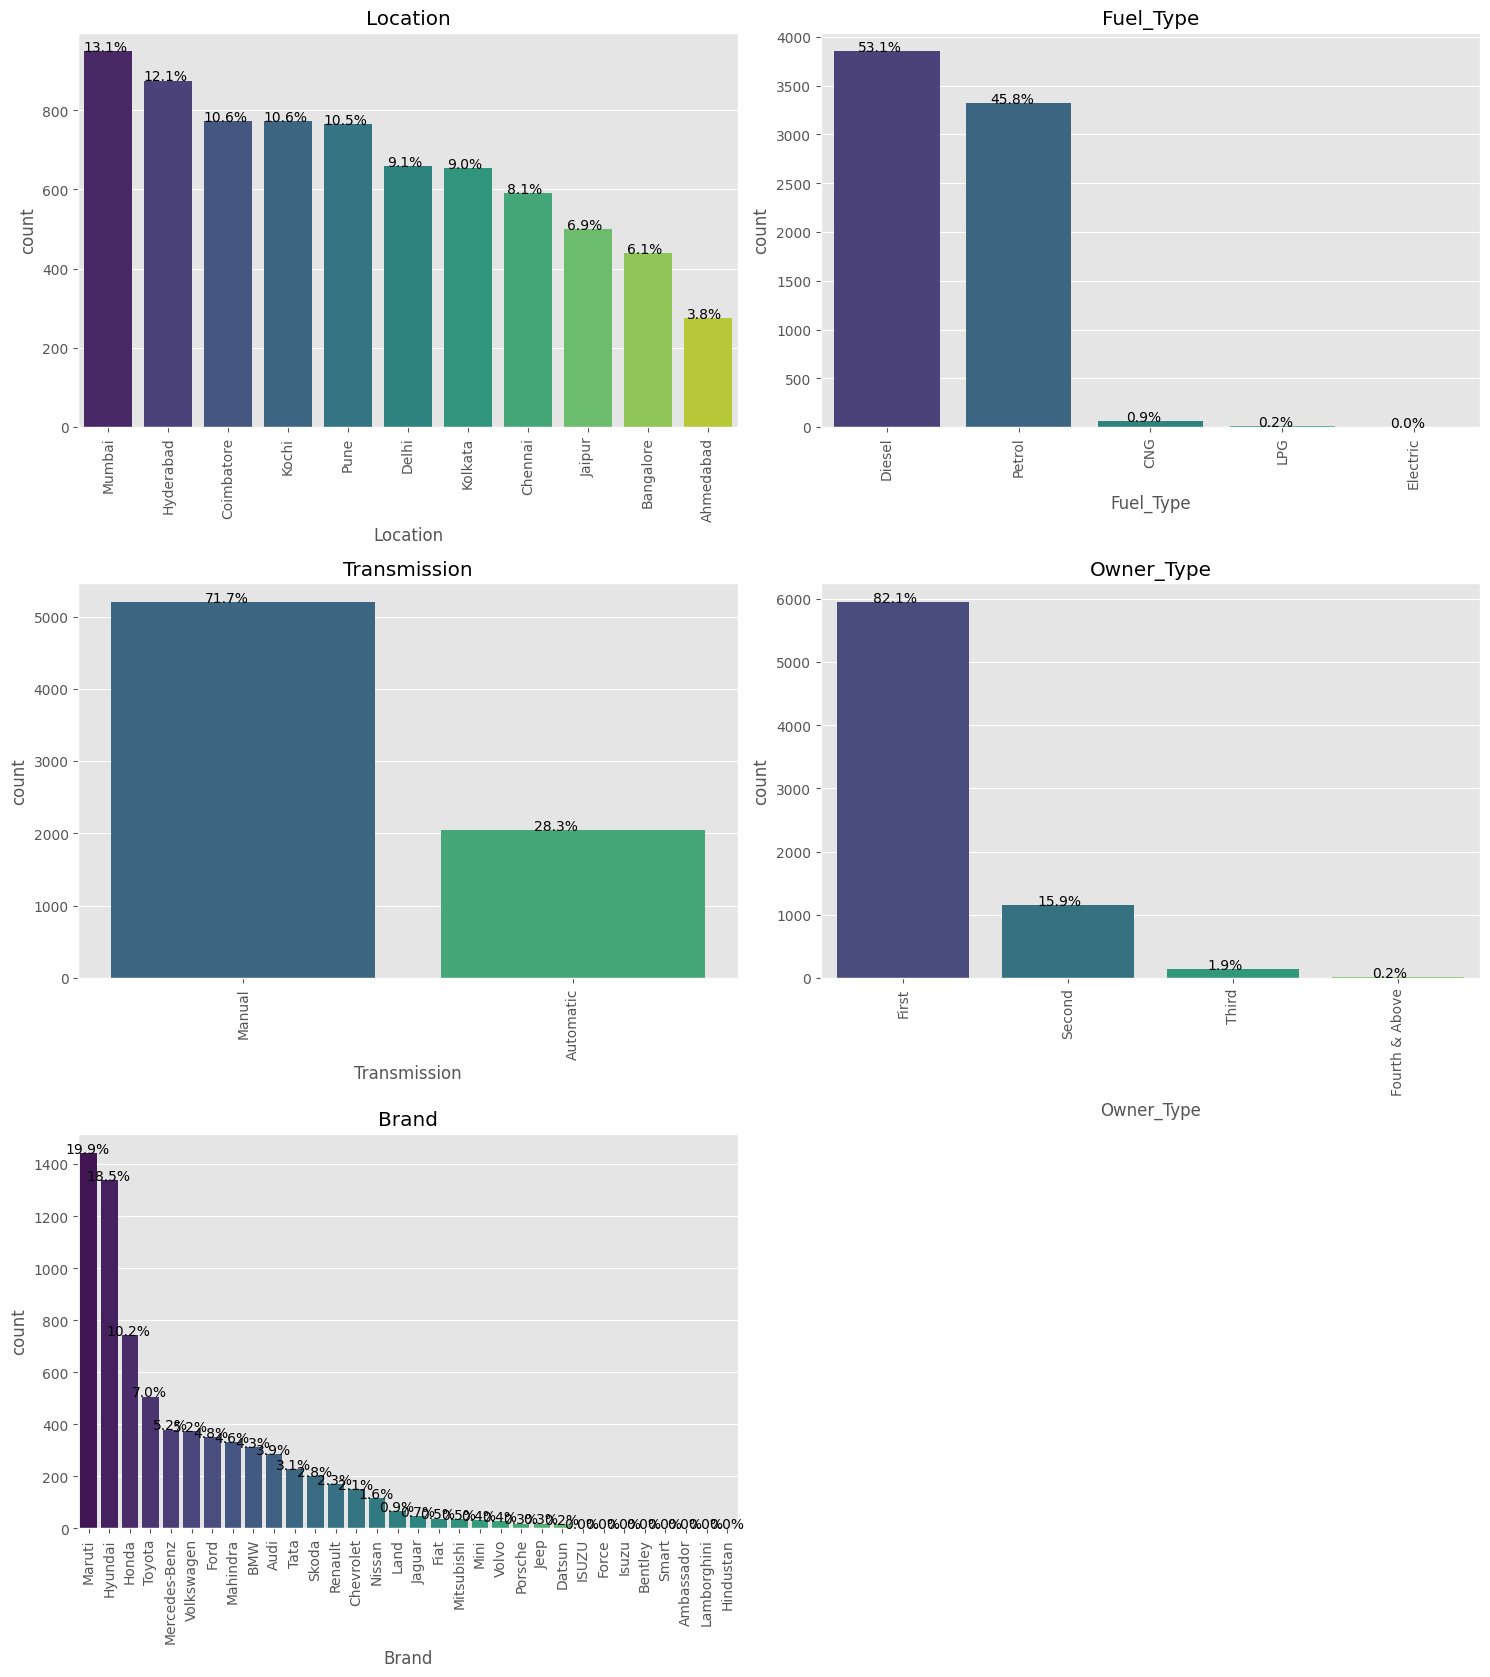

In [ ]:
cat_columns=['Location','Fuel_Type','Transmission', 'Owner_Type', 'Brand'] #cars.select_dtypes(exclude=np.number).columns.tolist()

plt.figure(figsize=(15,21))

for i, variable in enumerate(cat_columns):
                     plt.subplot(4,2,i+1)
                     order = cars[variable].value_counts(ascending=False).index
                     ax=sns.countplot(x=cars[variable], data=cars , order=order ,palette='viridis')
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(cars[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title(variable)

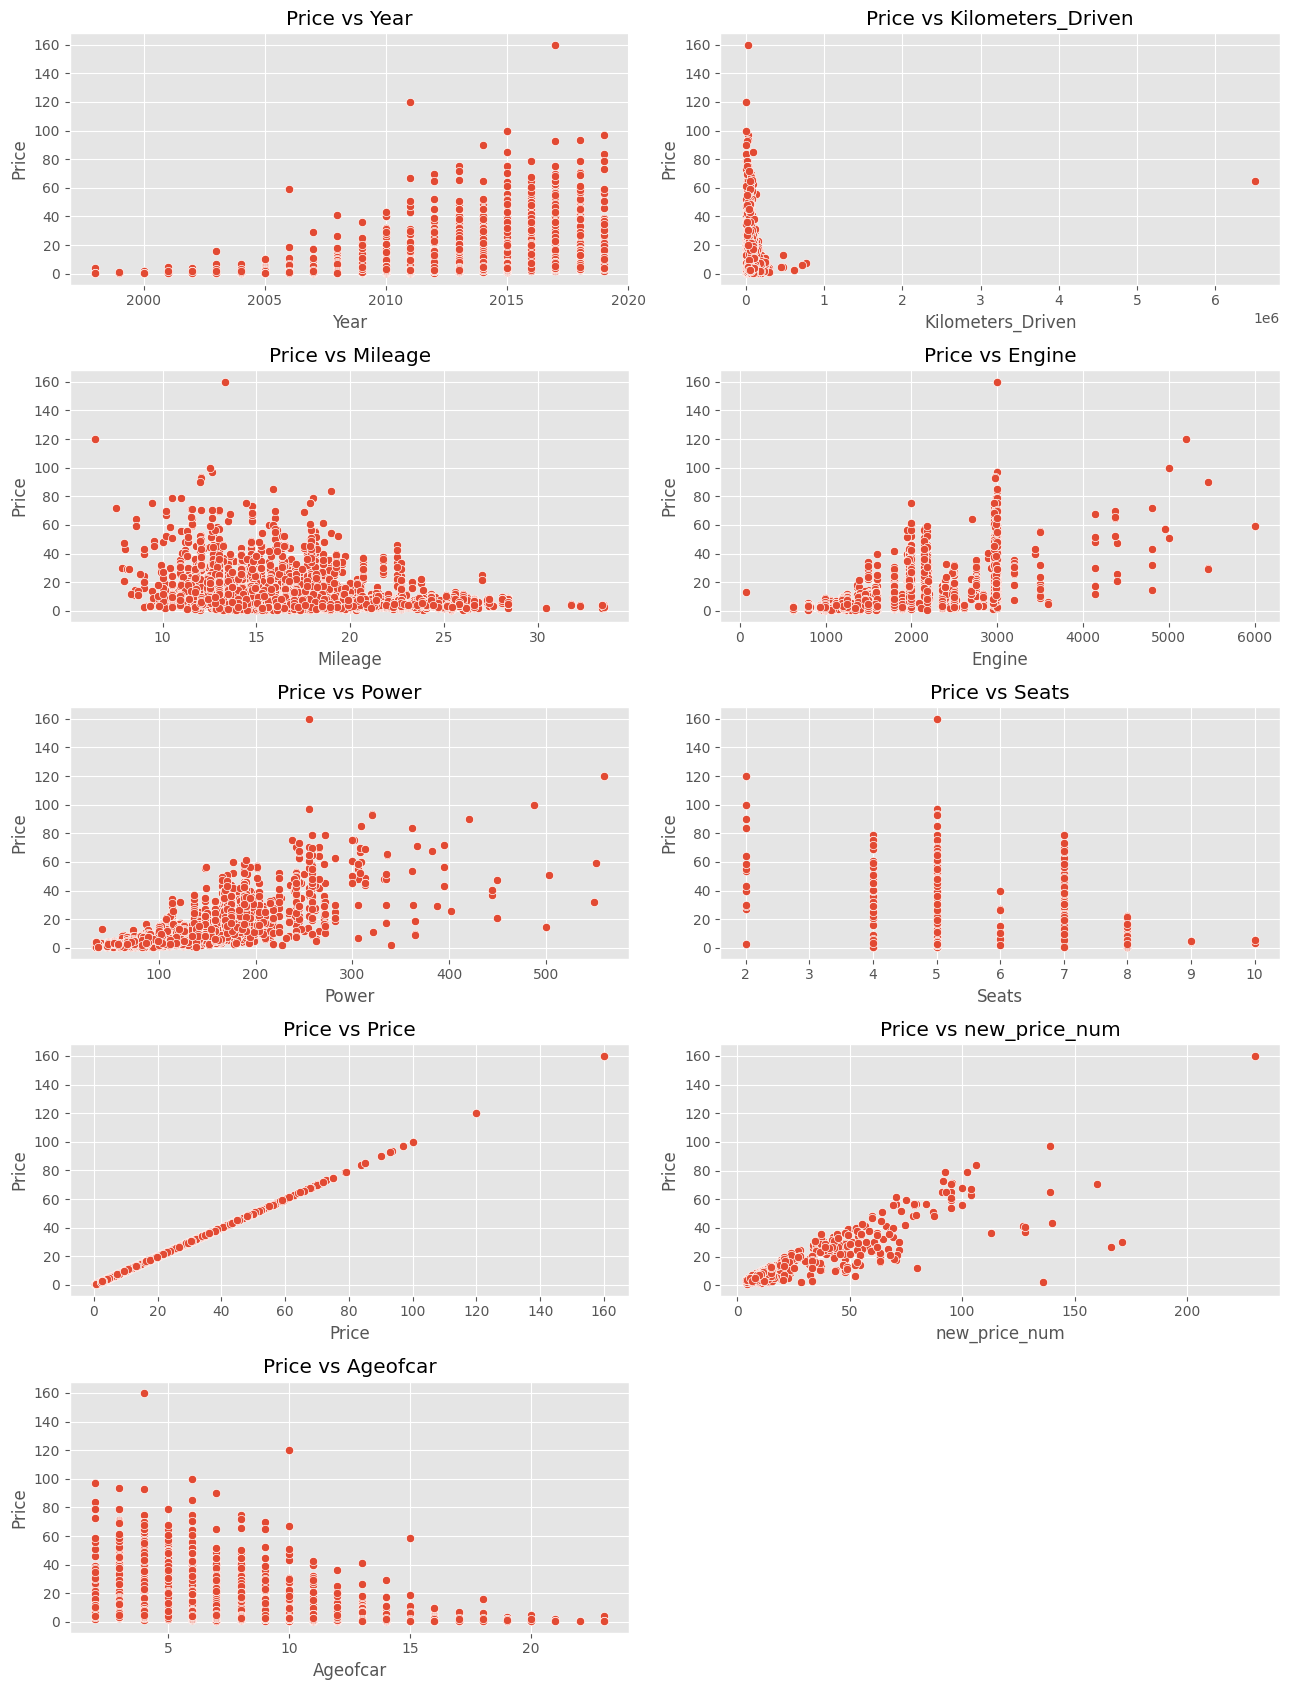

In [ ]:
numeric_columns= numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=cars[variable],y=cars['Price']).set(title='Price vs '+ variable)
                     #plt.xticks(rotation=90)
                     plt.tight_layout()

In [ ]:
cars.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 46
Power                 175
Seats                  54
New_Price            6246
Price                1233
new_price_num        6246
Ageofcar                0
Brand                   0
Model                   0
dtype: int64

In [ ]:
# counting the number of missing values per row
num_missing = cars.isnull().sum(axis=1)
num_missing.value_counts()

2    5025
3    1112
0     819
1     187
4      57
5      31
6      20
7       1
Name: count, dtype: int64

In [ ]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print("*" *30,f'\nFor the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = cars[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

****************************** 
For the rows with exactly 1 missing values, NAs are found in:
Mileage      5
Price      182
dtype: int64



****************************** 
For the rows with exactly 2 missing values, NAs are found in:
New_Price        5025
new_price_num    5025
dtype: int64



****************************** 
For the rows with exactly 3 missing values, NAs are found in:
Mileage            25
Power              74
Seats               1
New_Price        1112
Price            1012
new_price_num    1112
dtype: int64



****************************** 
For the rows with exactly 4 missing values, NAs are found in:
Mileage          35
Power            50
Seats             6
New_Price        57
Price            23
new_price_num    57
dtype: int64



****************************** 
For the rows with exactly 5 missing values, NAs are found in:
Mileage           6
Engine           25
Power            30
Seats            26
New_Price        31
Price             6
new_price_num    31


In [ ]:
col=['Engine','Power','Mileage']
cars[col].isnull().sum()

Engine      46
Power      175
Mileage     83
dtype: int64

In [ ]:
cars.groupby(['Name','Year'])['Engine'].median().head(30)

Name                                           Year
Ambassador Classic Nova Diesel                 2003   1489.00000
Audi A3 35 TDI Attraction                      2014   1968.00000
Audi A3 35 TDI Premium                         2016   1968.00000
Audi A3 35 TDI Premium Plus                    2015   1968.00000
                                               2016   1968.00000
Audi A3 35 TDI Technology                      2017   1968.00000
Audi A4 1.8 TFSI                               2010   1781.00000
                                               2011   1781.00000
Audi A4 1.8 TFSI Technology Edition            2012   1798.00000
Audi A4 2.0 TDI                                2009   1968.00000
                                               2011   1968.00000
                                               2012   1968.00000
                                               2013   1968.00000
                                               2014   1968.00000
Audi A4 2.0 TDI 177 Bhp Premium Plus  

In [101]:
col=['Engine','Power','Mileage']
cars[col].isnull().sum()

Engine      46
Power      175
Mileage     83
dtype: int64

In [102]:
cars.groupby(['Brand','Model'])['Engine'].median().head(10)

Brand       Model      
Ambassador  ClassicNova   1489.00000
Audi        A335          1968.00000
            A41.8         1781.00000
            A42.0         1968.00000
            A43.0         2967.00000
            A43.2         3197.00000
            A430          1395.00000
            A435          1968.00000
            A4New         1968.00000
            A62.0         1968.00000
Name: Engine, dtype: float64

In [106]:
col=['Engine','Power','Mileage']
cars[col].isnull().sum()

Engine      46
Power      175
Mileage     83
dtype: int64

In [108]:
cars.groupby(['Brand','Engine'])['Power'].agg({'mean','median','max'}).head(10)

max    median      mean
Brand      Engine                                  
Ambassador 1489.00000  35.50000  35.50000  35.50000
Audi       1395.00000 147.51000 147.51000 147.51000
           1781.00000 163.20000 163.20000 163.20000
           1798.00000 187.74000 187.74000 181.03333
           1968.00000 187.74000 174.33000 167.12318
           1984.00000 226.60000 207.90000 196.02200
           2698.00000 179.50000 179.50000 179.50000
           2773.00000 201.00000 201.00000 201.00000
           2894.00000 444.00000 444.00000 444.00000
           2967.00000 246.70000 241.40000 241.74000

In [109]:
cars['Seats'].isnull().sum()

0

In [113]:
cars[cars['Seats'].isnull()==True].head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar,Brand,Model
S.No.,,,,,,,,,,,,,,,,,


In [114]:
cars['Seats']=cars['Seats'].fillna(5)

In [116]:
cars["Location"] = cars["Location"].astype("category")
cars['Brand'] =cars['Brand'].astype("category")

In [117]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7252 non-null   object  
 1   Location           7252 non-null   category
 2   Year               7252 non-null   int64   
 3   Kilometers_Driven  7252 non-null   int64   
 4   Fuel_Type          7252 non-null   category
 5   Transmission       7252 non-null   category
 6   Owner_Type         7252 non-null   category
 7   Mileage            7169 non-null   float64 
 8   Engine             7206 non-null   float64 
 9   Power              7077 non-null   float64 
 10  Seats              7252 non-null   float64 
 11  New_Price          1006 non-null   object  
 12  Price              6019 non-null   float64 
 13  new_price_num      1006 non-null   float64 
 14  Ageofcar           7252 non-null   int64   
 15  Brand              7252 non-null   category
 16  Model      

In [119]:
cars.new_price_num.isnull().sum()

6246

In [124]:
cars.drop(['New_Price'],axis=1,inplace=True)

In [126]:
cars.groupby(['Brand'])['new_price_num'].median().sort_values(ascending=False)

Brand
Bentley         375.00000
Porsche         136.00000
Land            120.00000
Mercedes-Benz    78.76000
BMW              58.67000
Audi             55.61000
Jaguar           53.72000
Volvo            45.67000
Mini             42.12000
Isuzu            33.68000
Mitsubishi       33.21000
Skoda            31.36500
Toyota           23.25000
Jeep             22.95000
Ford             11.20000
Honda            11.15000
Mahindra         11.14500
Volkswagen       11.10500
Hyundai           9.74000
Nissan            9.51000
Fiat              8.95500
Maruti            7.87000
Tata              7.63000
Renault           4.93000
Datsun            4.37000
Ambassador            NaN
Chevrolet             NaN
Force                 NaN
Hindustan             NaN
ISUZU                 NaN
Lamborghini           NaN
Smart                 NaN
Name: new_price_num, dtype: float64

In [127]:
cars.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 46
Power                 175
Seats                   0
Price                1233
new_price_num        6246
Ageofcar                0
Brand                   0
Model                   0
dtype: int64

In [128]:
cols1 = ["Power","Mileage","Engine"]

for ii in cols1:
    cars[ii] = cars[ii].fillna(cars[ii].median())

In [129]:
cars.dropna(inplace=True,axis=0)

In [130]:
cars.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
new_price_num        0
Ageofcar             0
Brand                0
Model                0
dtype: int64

In [131]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,new_price_num,Ageofcar,Brand,Model
S.No.,,,,,,,,,,,,,,,,
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20000,1199.00000,88.70000,5.00000,4.50000,8.61000,10,Honda,JazzV
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36000,2755.00000,171.50000,8.00000,17.50000,21.00000,5,Toyota,InnovaCrysta
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56000,1462.00000,103.25000,5.00000,9.95000,10.65000,3,Maruti,CiazZeta
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.50000,2477.00000,175.56000,7.00000,15.00000,32.01000,7,Mitsubishi,PajeroSport
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69000,1995.00000,190.00000,5.00000,18.55000,47.87000,7,BMW,3Series


In [132]:
cars.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
new_price_num        0
Ageofcar             0
Brand                0
Model                0
dtype: int64

In [133]:
df.shape

(7253, 13)

In [134]:
cars.groupby(['Brand'])['Price'].agg({'median','mean','max'})

,max,median,mean
Brand,,,
Ambassador,NaN,NaN,NaN
Audi,72.94000,27.76500,35.21917
BMW,61.25000,22.24000,23.91807
Bentley,NaN,NaN,NaN
Chevrolet,NaN,NaN,NaN
Datsun,3.95000,3.31000,3.14286
Fiat,2.50000,2.50000,2.50000
Force,NaN,NaN,NaN
Ford,56.80000,8.45000,10.92320


In [135]:
Low=['Maruti',
     'Hyundai',
     'Ambassdor',
     'Hindustan',
     'Force',
     'Chevrolet',
     'Fiat',
     'Tata',
     'Smart',
     'Renault',
     'Datsun',
     'Mahindra',
     'Skoda',
     'Ford',
     'Toyota',
     'Isuzu',
     'Mitsubishi','Honda']

High=['Audi',
      'Mini Cooper',
      'Bentley',
      'Mercedes-Benz',
      'Lamborghini',
      'Volkswagen',
      'Porsche',
      'Land Rover',
      'Nissan',
      'Volvo',
      'Jeep',
      'Jaguar',
      'BMW']

In [136]:
def classrange(x):
    if x in Low:
        return "Low"
    elif x in High:
        return "High"
    else:
        return x

In [137]:
cars['Brand_Class'] = cars['Brand'].apply(lambda x: classrange(x))

In [138]:
cars['Brand_Class'].unique()

array(['Low', 'High', 'Mini', 'Land'], dtype=object)

In [139]:
cars['Engine']=cars['Engine'].astype(int)
cars['Brand_Class']=cars["Brand_Class"].astype('category')

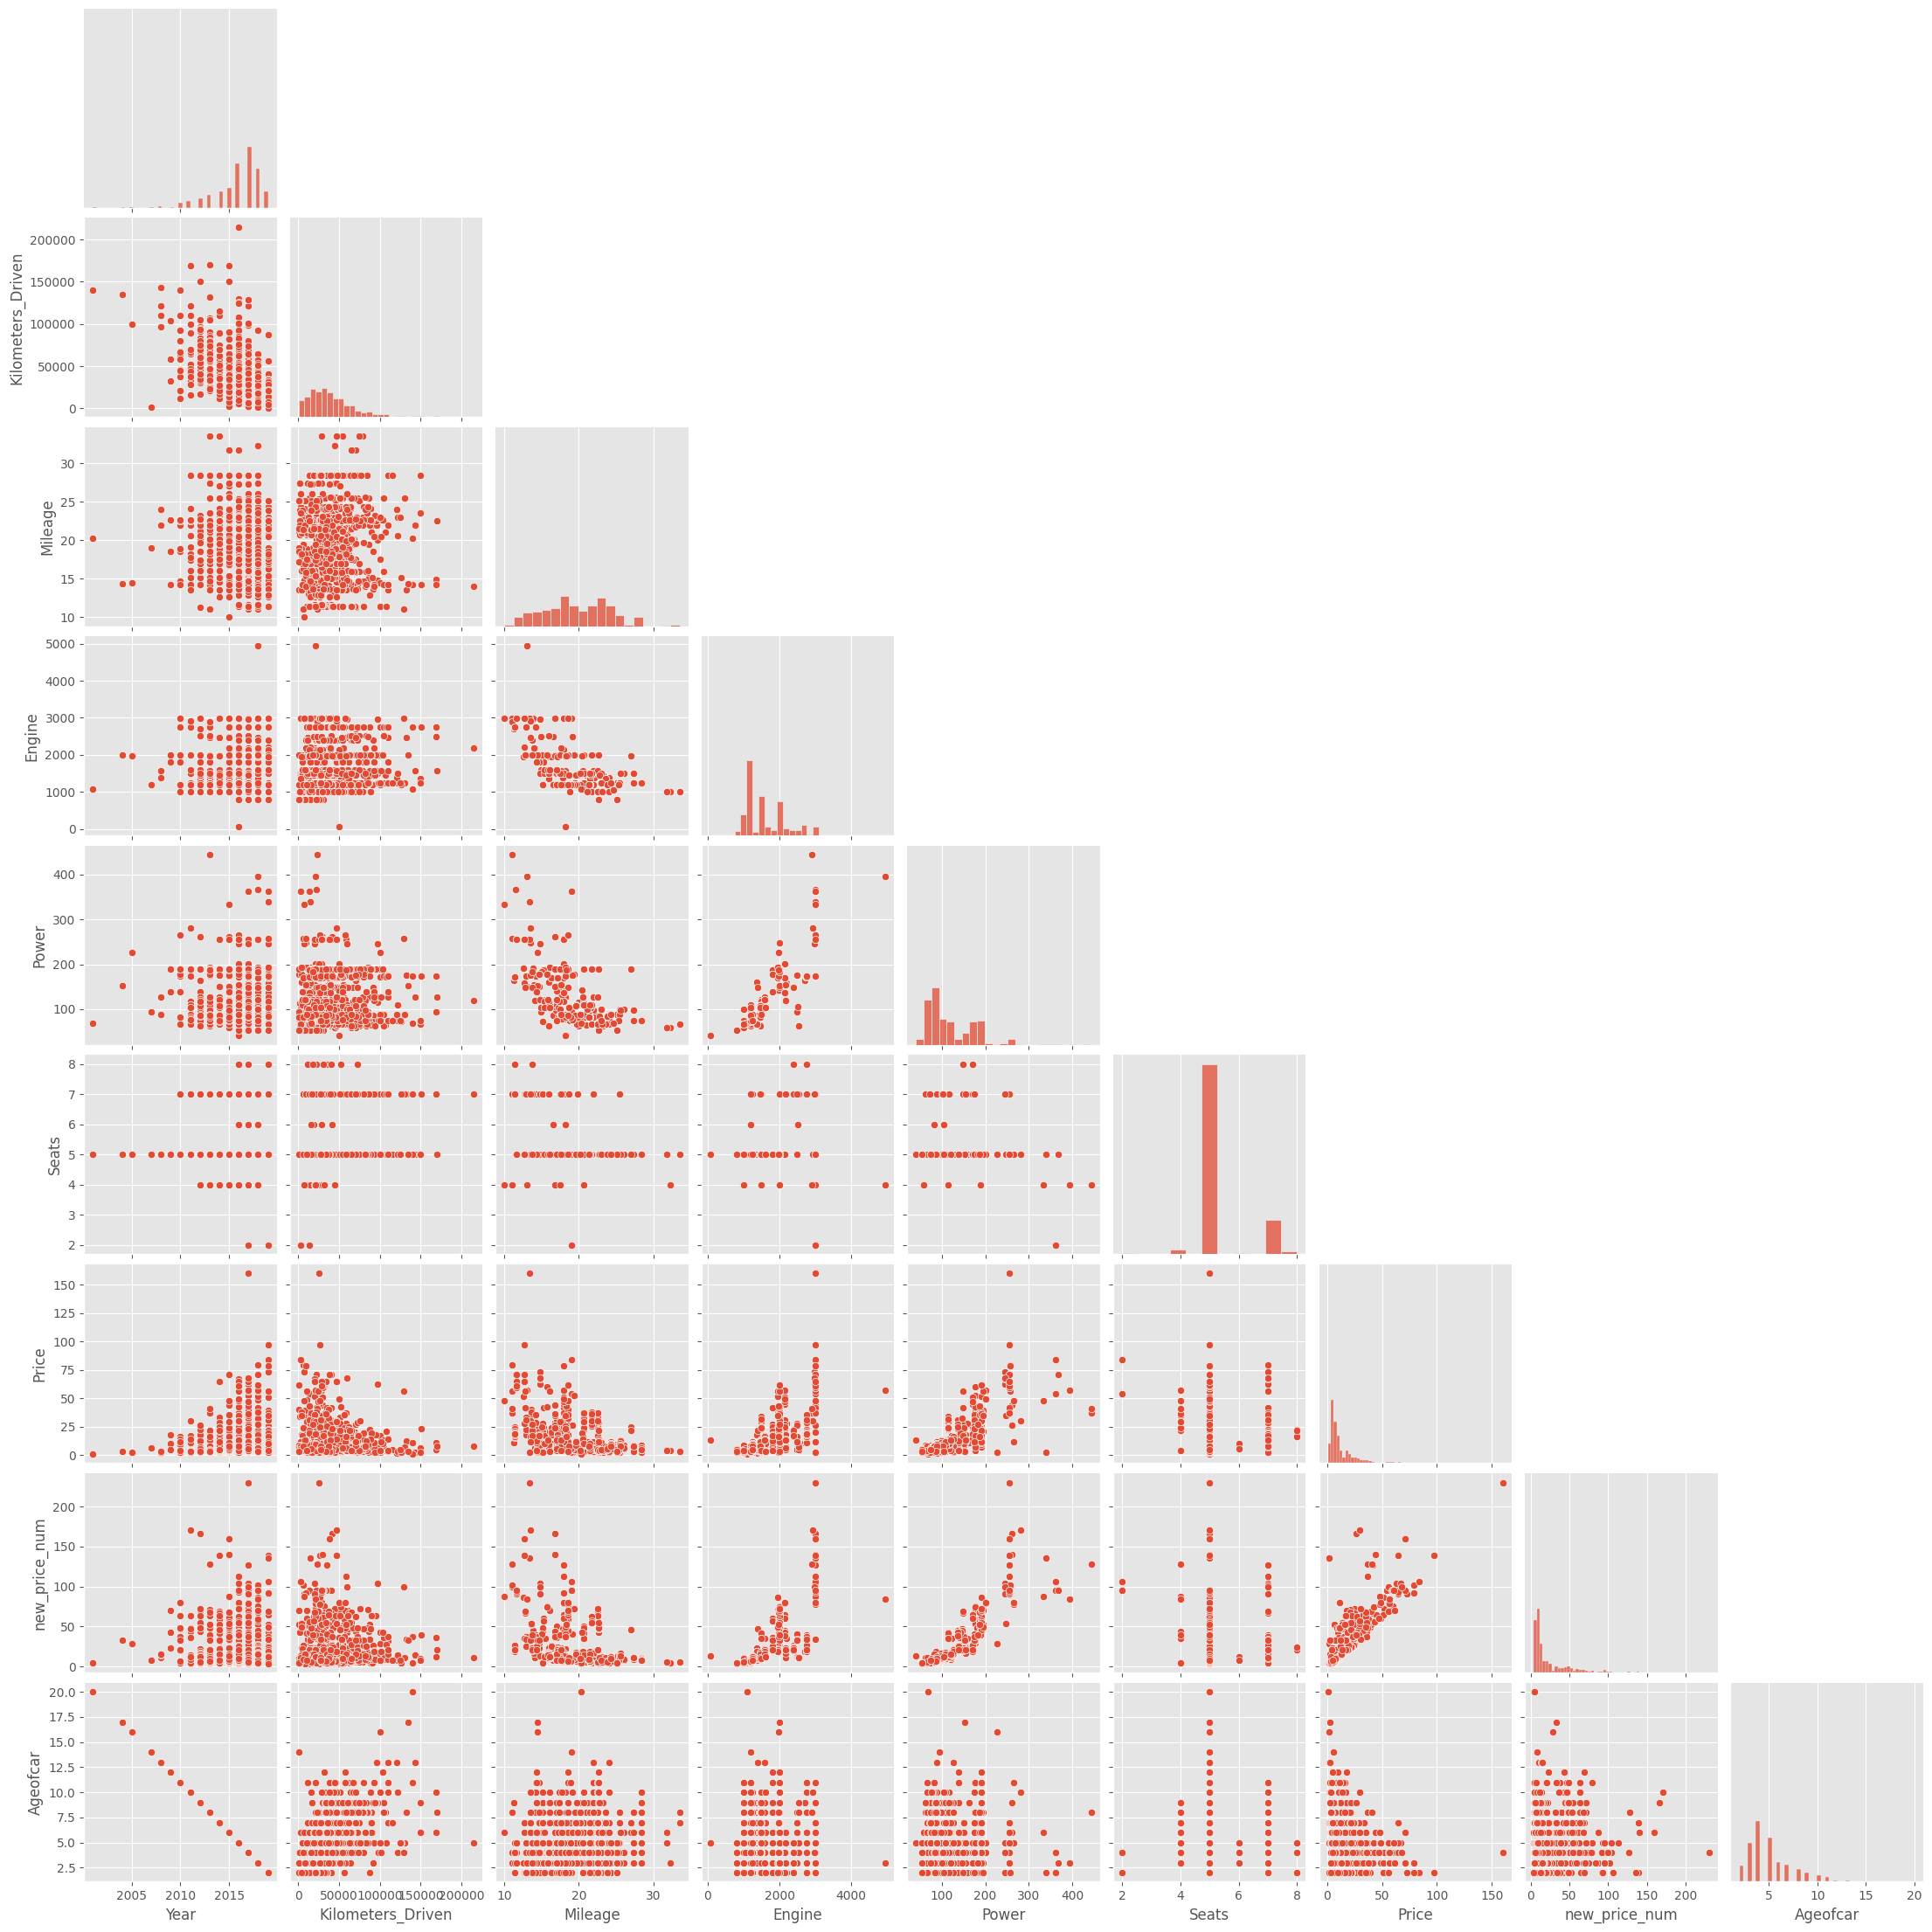

In [141]:
sns.pairplot(data=cars , corner=True)
plt.show()